In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

# 定义 CNN 模型
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = torch.max_pool2d(x, kernel_size=2, stride=2)
        x = torch.relu(self.conv2(x))
        x = torch.max_pool2d(x, kernel_size=2, stride=2)
        x = x.view(-1, 64 * 7 * 7)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# 数据预处理
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# 加载数据集
train_set = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)

# 创建模型、损失函数和优化器
model = SimpleCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 训练模型
epochs = 5
for epoch in range(epochs):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        if i % 100 == 99:
            print(f"[Epoch {epoch + 1}, Batch {i + 1}] loss: {running_loss / 100:.3f}")
            running_loss = 0.0

print('Finished Training')


100.0%


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw



100.0%


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw



100.0%


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw



100.0%


Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw

[Epoch 1, Batch 100] loss: 0.721
[Epoch 1, Batch 200] loss: 0.179
[Epoch 1, Batch 300] loss: 0.121
[Epoch 1, Batch 400] loss: 0.102
[Epoch 1, Batch 500] loss: 0.090
[Epoch 1, Batch 600] loss: 0.070
[Epoch 1, Batch 700] loss: 0.072
[Epoch 1, Batch 800] loss: 0.065
[Epoch 1, Batch 900] loss: 0.058
[Epoch 2, Batch 100] loss: 0.038
[Epoch 2, Batch 200] loss: 0.053
[Epoch 2, Batch 300] loss: 0.049
[Epoch 2, Batch 400] loss: 0.037
[Epoch 2, Batch 500] loss: 0.049
[Epoch 2, Batch 600] loss: 0.043
[Epoch 2, Batch 700] loss: 0.051
[Epoch 2, Batch 800] loss: 0.051
[Epoch 2, Batch 900] loss: 0.035
[Epoch 3, Batch 100] loss: 0.033
[Epoch 3, Batch 200] loss: 0.026
[Epoch 3, Batch 300] loss: 0.025
[Epoch 3, Batch 400] loss: 0.034
[Epoch 3, Batch 500] loss: 0.030
[Epoch 3, Batch 600] loss: 0.031
[Epoch 3, Batch 700] loss: 0.033
[Epoch 3, Batch 800] loss: 0.028
[Epoch 3, Batch 900] loss: 0.034
[Epoch 4, Batch 100] loss: 0.015
[

In [3]:
# 保存模型
torch.save(model.state_dict(), 'mnist_LeNet_model.pth')


In [4]:
# 加载模型
model = SimpleCNN()
model.load_state_dict(torch.load('mnist_LeNet_model.pth'))
model.eval()  # 将模型设置为评估模式，这将关闭 dropout 和 batch normalization

# 加载测试集
test_set = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=64, shuffle=False)

# 测试模型
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))


Accuracy of the network on the 10000 test images: 99 %


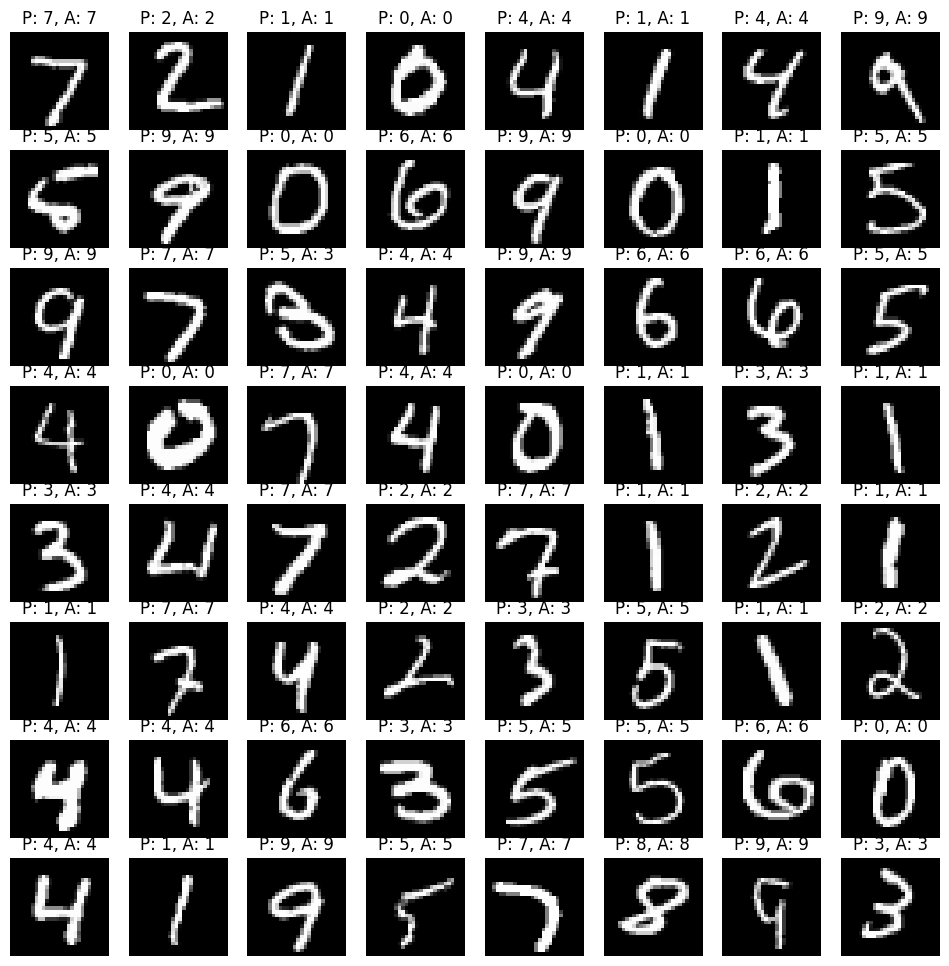

In [7]:
import matplotlib.pyplot as plt

# 加载测试集
test_set = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=64, shuffle=False)

# 测试模型并可视化预测结果
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

        # 可视化预测结果
        fig, axes = plt.subplots(8, 8, figsize=(12, 12))
        for i, ax in enumerate(axes.flat):
            ax.imshow(images[i][0], cmap='gray')
            ax.set_title(f'P: {predicted[i]}, A: {labels[i]}')
            ax.axis('off')
        plt.show()

        break  # 只显示一个 batch 的预测结果
